## 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법

### 캐글의 캐글 주택 가격: 고급 회귀 기법 데이터 세트를 이용

#### https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 데이터 사전 처리 (Preprocessing)

In [209]:
# 데이터 원본
# 데이터 전처리 등의 데이터 가공으로 데이터가 원본과 달라지게 되므로
# 처음에 데이터 원본을 별도로 저장하는 것이 좋다.
house_df_org = pd.read_csv('house_train.csv')

# 분석에 사용할 데이터
# 데이터 원본을 복사하기
house_df = house_df_org.copy()
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [210]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [211]:
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [212]:
house_df.shape

(1460, 81)

In [213]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [214]:
isnull_series = house_df.isnull().sum()
isnull_series

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [215]:
isnull_series[isnull_series > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [216]:
isnull_series[isnull_series > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [217]:
isnull_series[isnull_series > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

### 회귀 모델을 적용하기 전에 타깃 값의 분포도가 정규분포인지 확인하기

C:\Users\admin\AppData\Local\Temp\ipykernel_22412\3253124377.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['SalePrice'])


<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

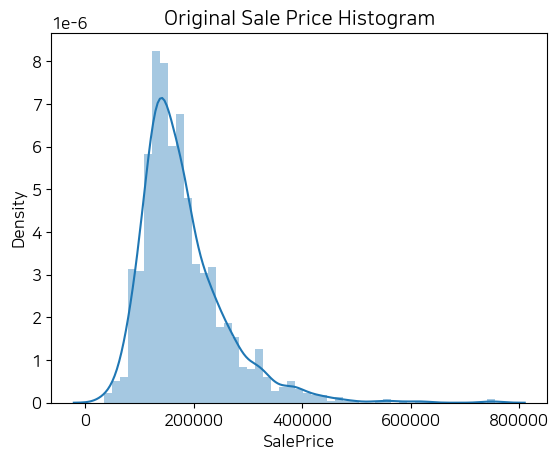

In [218]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

#### -> 데이터 값의 분포가 중심에서 왼쪽으로 치우친 형태

#### -> 정규분포에서 벗어나 있다.

<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

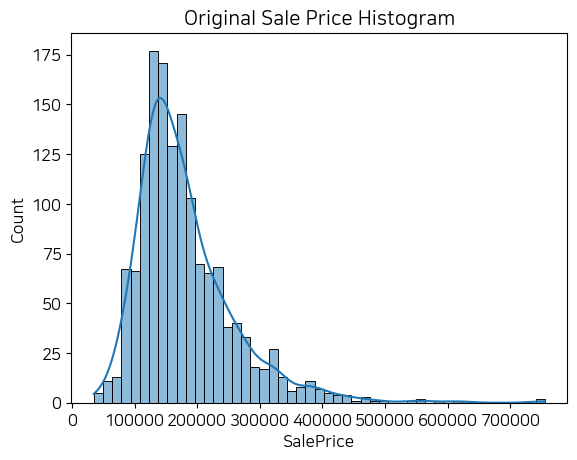

In [219]:
plt.title('Original Sale Price Histogram')
sns.histplot(data=house_df, x='SalePrice', kde=True)

### 정규분포가 아닌 결과값을 정규분포 형태로 변환

### -> 로그 변환 (Log Transformation)

#### Numpy의 log1p()를 이용해 로그 변환한 결과값을 기반으로 학습한 뒤, 예측 시에는 다시 결과값을 expm1()으로 추후에 환원하면 된다.

In [220]:
# 로그 변환 (Log Transformation)
log_saleprice = np.log1p(house_df['SalePrice'])

<Axes: title={'center': 'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

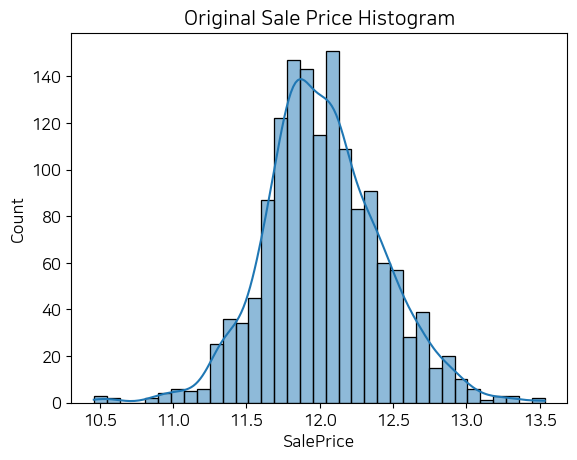

In [221]:
plt.title('Original Sale Price Histogram')
sns.histplot(x=log_saleprice, kde=True)

#### -> SalePrice를 로그 변환한 결과 정규분포 형태로 결과값이 분포함을 확인할 수 있다.

In [222]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [223]:
# Null 값이 많은 피처 삭제하기
house_df.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],
              inplace=True)

In [224]:
house_df.mean(numeric_only=True)

MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   

In [225]:
# house_df.fillna(house_df.mean(), inplace=True)
house_df.fillna(house_df.mean(numeric_only=True), inplace=True)

In [226]:
isnull_series = house_df.isnull().sum()
null_columns = isnull_series[isnull_series > 0].sort_values(ascending=False)
null_columns

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
Electrical       1
dtype: int64

In [227]:
isnull_series.index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [228]:
null_columns.index

Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'Electrical'],
      dtype='object')

In [229]:
house_df.dtypes[null_columns.index]

GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
BsmtExposure    object
BsmtFinType2    object
BsmtQual        object
BsmtCond        object
BsmtFinType1    object
Electrical      object
dtype: object

In [230]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [231]:
house_df.shape

(1460, 74)

### 원-핫 인코딩

In [232]:
house_df_ohe = pd.get_dummies(house_df)
house_df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [233]:
house_df_ohe = pd.get_dummies(house_df, dtype=int)
house_df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [234]:
house_df_ohe.shape

(1460, 267)

In [235]:
isnull_series = house_df_ohe.isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

Series([], dtype: int64)

#### -> 원-핫 인코딩 후 피처가 증가했다.

### 선형 회귀 모델 학습 / 예측 / 평가

#### 실제값도 로그 변환되었고, 예측값도 이를 반영한 로그 변환 값이므로

#### 예측 결과 오류에 RMSE만 적용하면 RMSLE가 자동으로 측정된다.

In [236]:
# 로그 변환된 RMSE를 계산하는 함수 생성하기
def get_rmse(model, x_test, y_test):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

def get_rmses(models, x_test, y_test):
    rmses = []
    for model in models:
        rmse = get_rmse(model, x_test, y_test)
        rmses.append(rmse)
    return rmses

#### -> get_rmse(model)은 단일 모델의 RMSE 값을 반환

#### -> get_rmses(models)는 get_rmse()를 이용해 여러 모델의 RMSE 값을 반환

In [237]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [238]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop(columns=['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg= LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models, x_test, y_test)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.127
Lasso 로그 변환된 RMSE:  0.176


[0.13170346544396674, 0.12743057784210612, 0.17628250556471395]

#### -> Lasso 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나왔다.

#### -> Lasso는 최적 하이퍼 파라미터 튜닝이 필요해보인다.

#### 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인해보기

#### 피처가 많으므로, 회귀 계수 값의 상위 10개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 판다스 Series 객체를 반환하는 함수 만들기

In [239]:
np.expm1(0.132)

0.1411083192672351

In [240]:
# 회귀 계수 값의 상위 10개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 
# 판다스 Series 객체를 반환하는 함수 만들기
def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성, index는 칼럼명
    coef = pd.Series(model.coef_, index=x.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해서 반환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [241]:
get_top_bottom_coef(lasso_reg)

(YearBuilt       0.002551
 YearRemodAdd    0.001191
 GarageArea      0.000379
 GrLivArea       0.000305
 WoodDeckSF      0.000183
 TotalBsmtSF     0.000158
 ScreenPorch     0.000154
 BsmtFinSF1      0.000029
 MasVnrArea      0.000019
 2ndFlrSF        0.000017
 dtype: float64,
 Condition2_PosN         -0.000000e+00
 Condition2_RRAe         -0.000000e+00
 Condition2_RRAn         -0.000000e+00
 Condition2_RRNn         -0.000000e+00
 BldgType_1Fam            0.000000e+00
 BldgType_2fmCon         -0.000000e+00
 BldgType_Duplex         -0.000000e+00
 SaleCondition_Partial    0.000000e+00
 MiscVal                 -6.186043e-07
 PoolArea                -6.327429e-05
 dtype: float64)

In [242]:
# 모델별 회귀 계수를 시각화 하는 함수 생성하기
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),ncols=3,nrows=1)
    # 레이아웃 설정
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        # ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__,size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-128)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

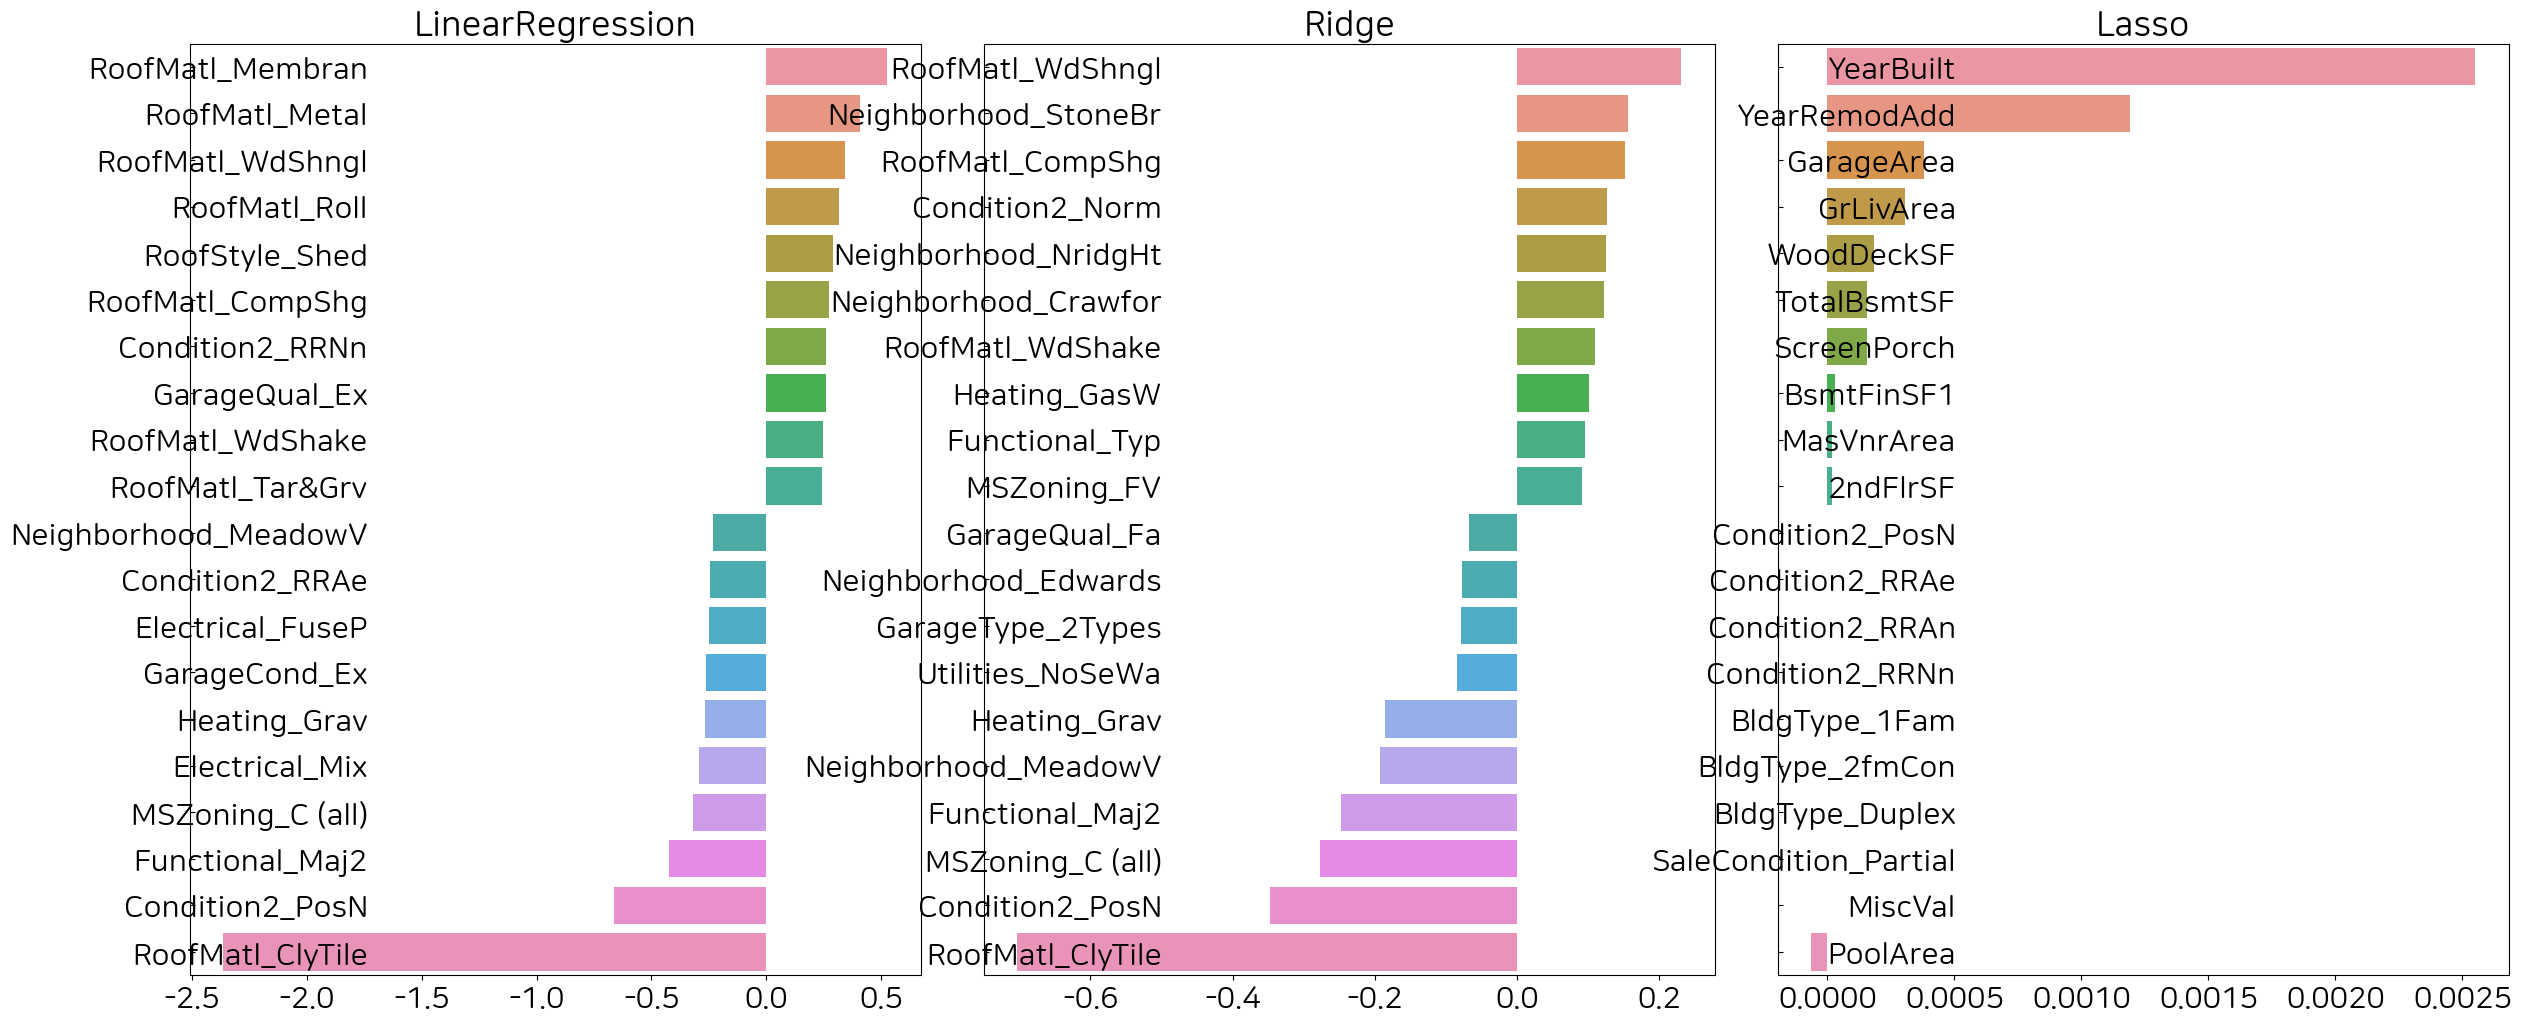

In [243]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [244]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10),ncols=3,nrows=1)
    # fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        axs[i_num].set_title(model.__class__.__name__,size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-128)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values,y=coef_concat.index,ax=axs[i_num])

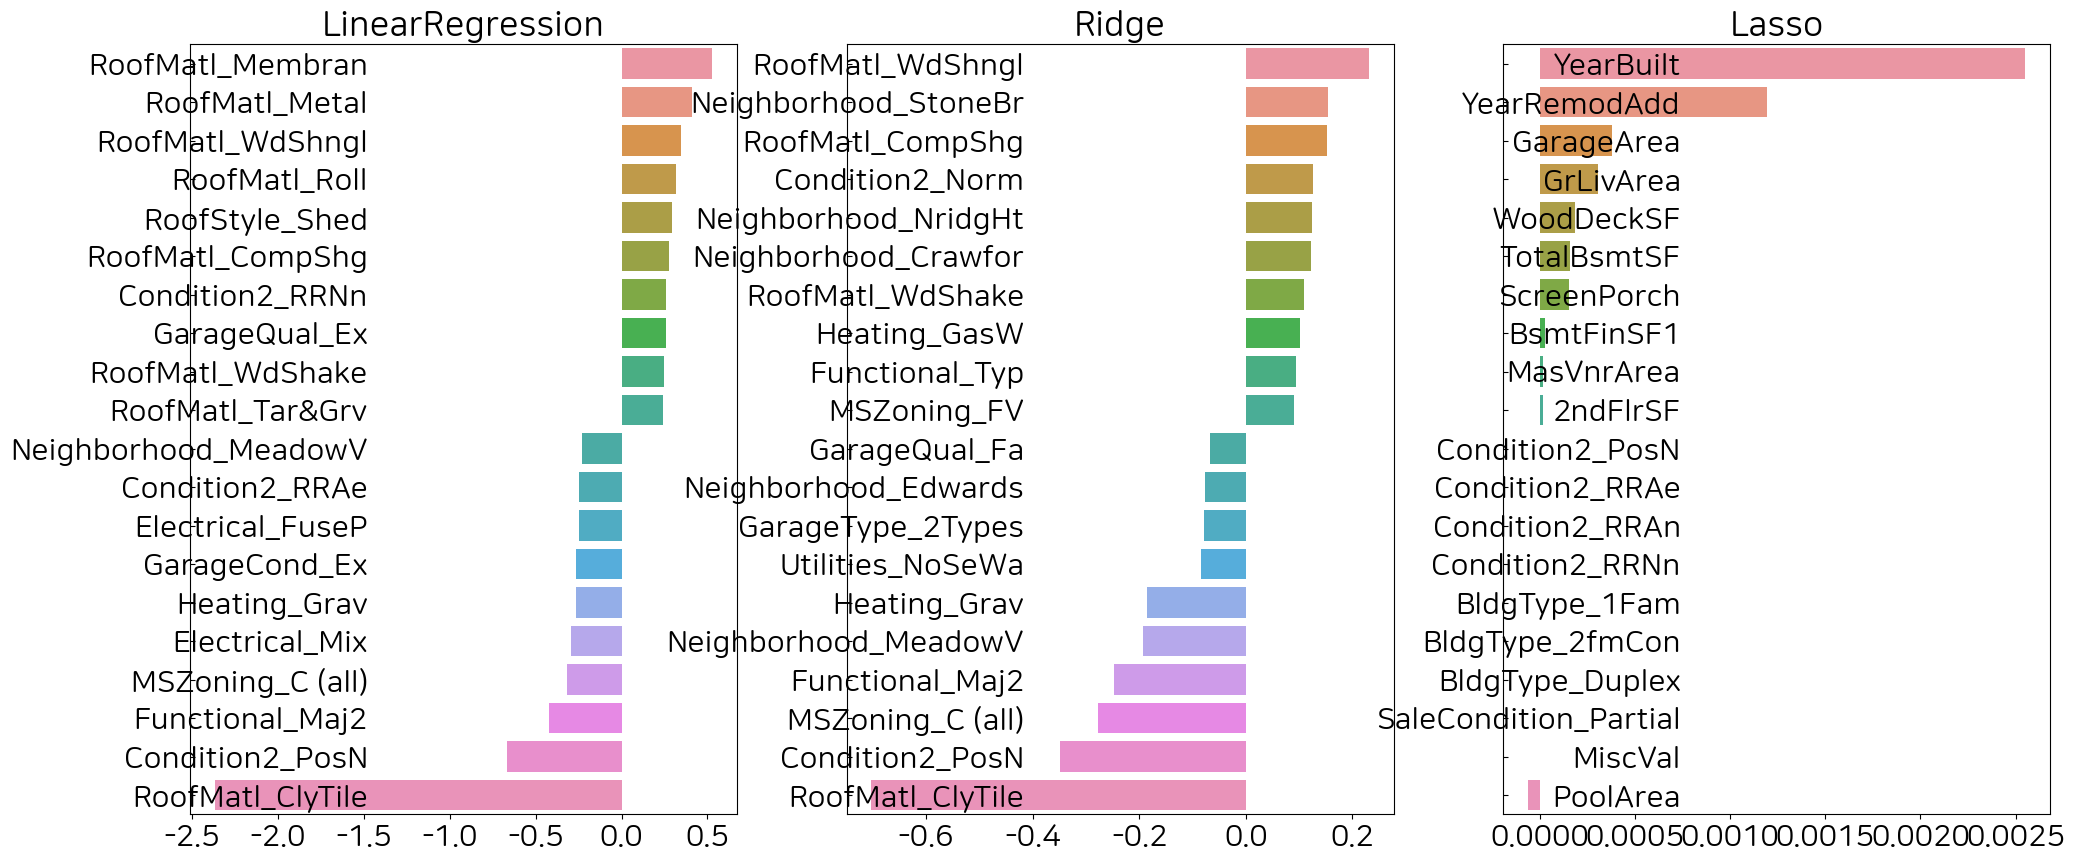

In [245]:
# 함수 코드 일부분 주석 처리 후 다시 실행해보기
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [246]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        # 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list = np.sqrt(cross_val_score(model,x,y,scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트: {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평균: {rmse_avg}')

In [247]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,x,y,scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트: {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평균: {rmse_avg}')

In [248]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

# 앞에서 계산한 결과와 비교해보기

# LinearRegression 로그 변환된 RMSE:  0.132
# Ridge 로그 변환된 RMSE:  0.127
# Lasso 로그 변환된 RMSE:  0.176
# [0.13170346544396674, 0.12743057784210612, 0.17628250556471395]

LinearRegression rmse 값 리스트: [0.13490851 0.16426367 0.16637528 0.11076123 0.19760965]
LinearRegression rmse 값 평균: 0.15478366810570138
Ridge rmse 값 리스트: [0.11733805 0.15411575 0.14184728 0.11638648 0.1886241 ]
Ridge rmse 값 평균: 0.14366233389500577
Lasso rmse 값 리스트: [0.16077499 0.20437243 0.17676683 0.18127643 0.2651206 ]
Lasso rmse 값 평균: 0.1976622573181429


In [249]:
def print_best_params(model,params):
    from sklearn.model_selection import GridSearchCV
    grid_model = GridSearchCV(model,
                              param_grid=params,
                              scoring='neg_mean_squared_error',
                              cv=5)
    grid_model.fit(x,y)
    rmse = np.sqrt(-grid_model.best_score_)
    print(f'최적 rmse:{rmse}, 최적 alpha :{grid_model.best_params_}')

In [250]:
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)
# Ridge rmse 값 평 균 : 0.14385021807917392
# Lasso rmse 값 평 균 : 0.1976622573181429

최적 rmse:0.14166409040637729, 최적 alpha :{'alpha': 10}
최적 rmse:0.14195569268952382, 최적 alpha :{'alpha': 0.001}


In [251]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models, x_test, y_test)

# 앞에서 계산한 결과와 비교해보기

# LinearRegression  로그 변환된 RMSE :  0.13189576579154072
# Ridge  로그 변환된 RMSE :  0.12750846334053154
# Lasso  로그 변환된 RMSE :  0.17628250556471395

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


[0.13170346544396674, 0.12393954255752371, 0.11995999790895519]

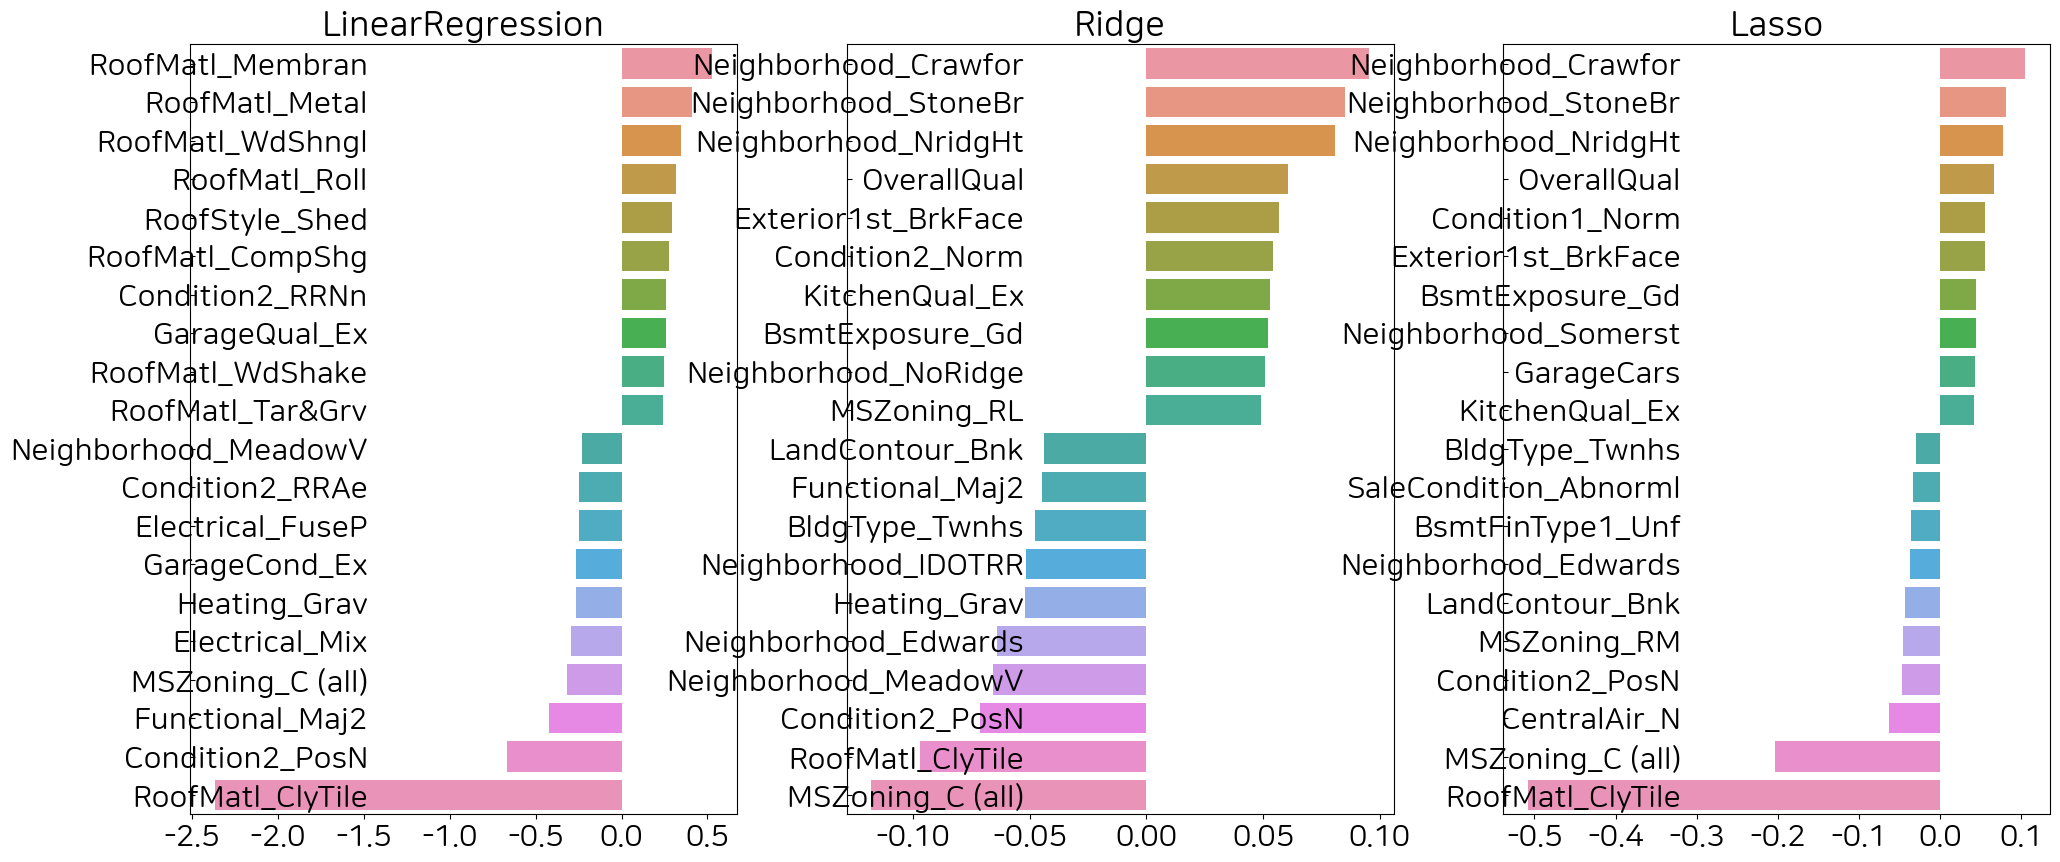

In [252]:
# 모든 모델의 회귀 계수 시각화
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

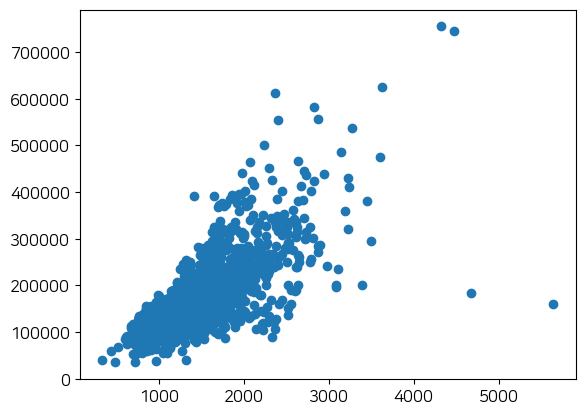

In [253]:
# 산점도
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])

In [254]:
cond1 = house_df_ohe['GrLivArea'] > 4000
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)

In [255]:
outlier_index = house_df_ohe[cond1 & cond2].index

In [256]:
outlier_index

Int64Index([523, 1298], dtype='int64')

In [257]:
house_df_ohe.shape

(1460, 267)

In [258]:
y = house_df_ohe['SalePrice'] 
x = house_df_ohe.drop(columns=['SalePrice'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=156)

lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)
# Ridge rmse 값 평  균 : 0.14385021807917392
# Lasso rmse 값 평  균 : 0.1976622573181429

최적 rmse:0.14166409040637729, 최적 alpha :{'alpha': 10}
최적 rmse:0.14195569268952382, 최적 alpha :{'alpha': 0.001}


In [259]:
# 앞의 코드 복사해서 붙여넣음
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models, x_test, y_test)

# 앞에서 계산한 결과와 비교해보기

# LinearRegression  로그 변환된 RMSE :  0.13189576579154072
# Ridge  로그 변환된 RMSE :  0.12750846334053154
# Lasso  로그 변환된 RMSE :  0.17628250556471395

# 앞에서 계산한 결과와 비교해보기

# LinearRegression 로그 변환된 RMSE:  0.132
# Ridge 로그 변환된 RMSE:  0.124
# Lasso 로그 변환된 RMSE:  0.12
# [0.13170346544396674, 0.12393954255752371, 0.11995999790895519]

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


[0.13170346544396674, 0.12374801051237065, 0.11995999790895519]

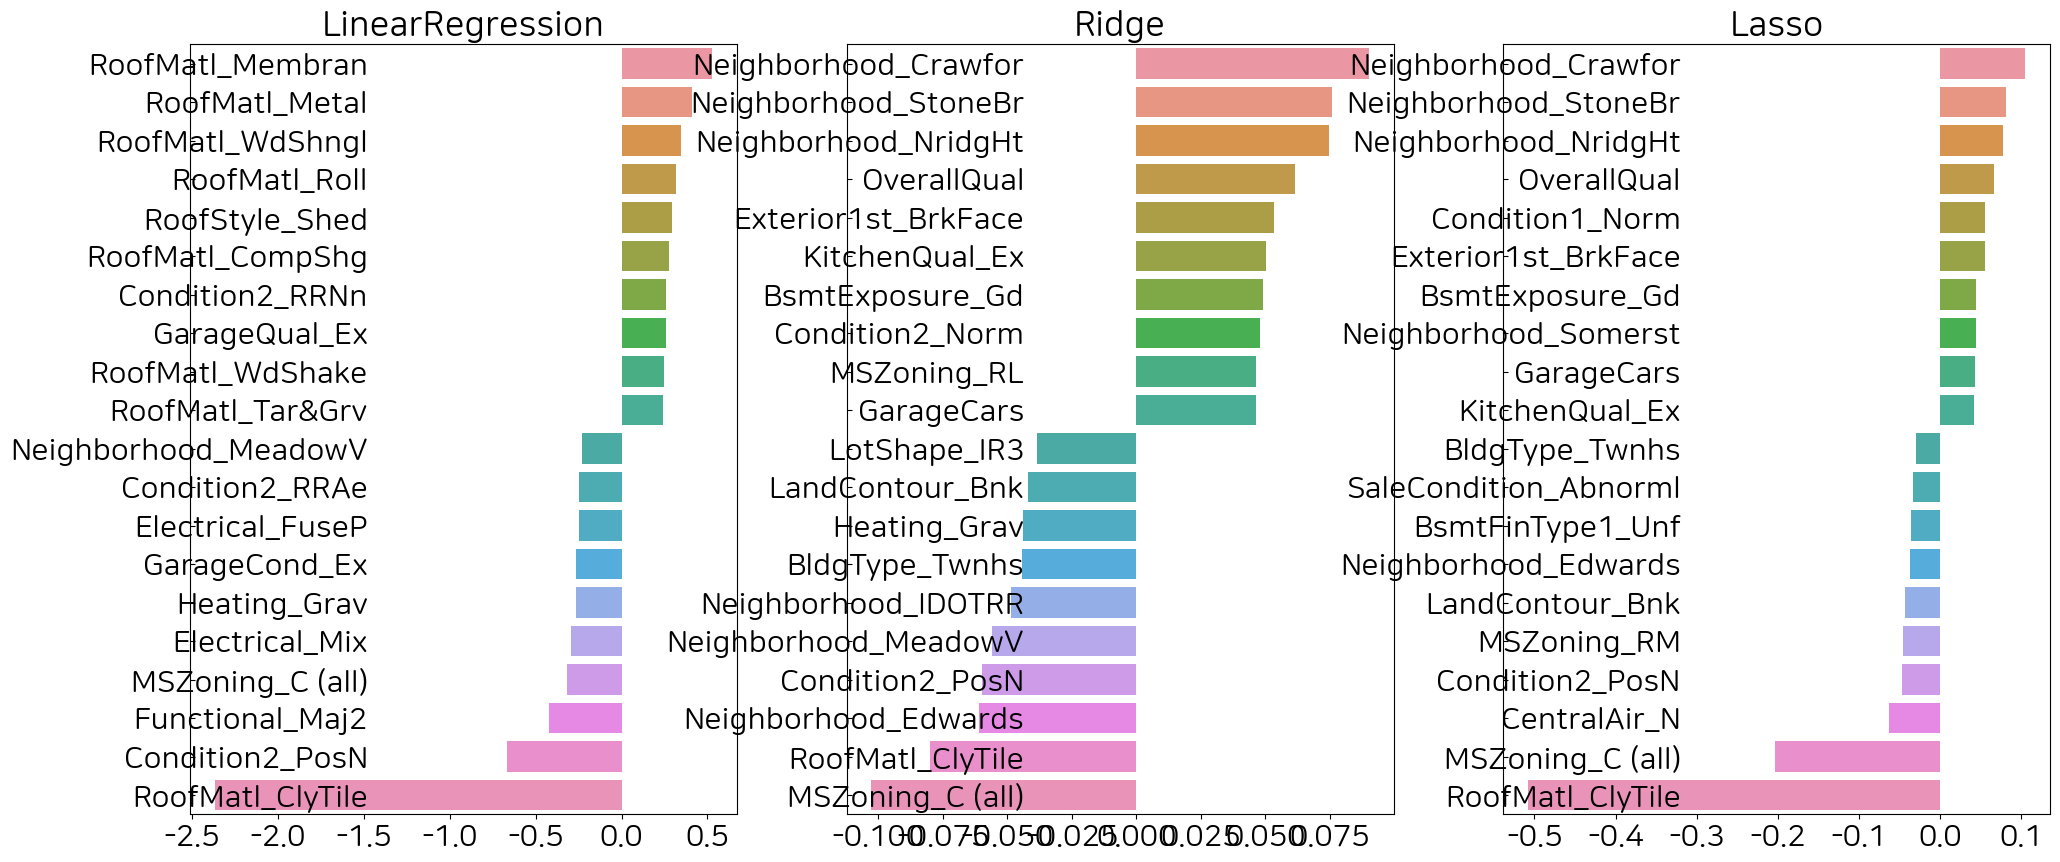

In [260]:
# 모든 모델의 회귀 계수 시각화
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)